# Exploratory Data Analysis | Customers

`customers.csv` - the training data, consisting of the purchases each customer for each date, as well as additional information. Duplicate rows correspond to multiple purchases of the same item. Your task is to predict the article_ids each customer will purchase during the 7-day period immediately after the training data period.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Info

In [2]:
df = pd.read_csv('../data/00_raw/customers.csv')

In [3]:
df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [4]:
df.shape

(1371980, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [6]:
df.describe()

,FN,Active,age
count,476930.0,464404.0,1.356119e+06
mean,1.0,1.0,3.638696e+01
std,0.0,0.0,1.431363e+01
min,1.0,1.0,1.600000e+01
25%,1.0,1.0,2.400000e+01
50%,1.0,1.0,3.200000e+01
75%,1.0,1.0,4.900000e+01
max,1.0,1.0,9.900000e+01


## Exploratory Data Analysis

### Categorical Feature Analysis

In [7]:
# either 1 or null
df.FN.value_counts()

1.0    476930
Name: FN, dtype: int64

In [9]:
# either 1 or null
df.Active.value_counts()

1.0    464404
Name: Active, dtype: int64

In [11]:
df.club_member_status.value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [12]:
df.fashion_news_frequency.value_counts()

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

In [13]:
df.postal_code.value_counts()

2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
                                                                     ...  
16dd7e391f305b54c01ffed87c189e33de83158d0a808d1b346222703742f638         1
5ce1c699380b3c13655347c9636043f5e64ec2538a1ee7d42dd253a584577630         1
afdedc642d01efeefec6fc8d3394724a71888ebd0ff0311eff6f34946589479d         1
4c8838d278d23029c920b9684fa4cf30a532428a445afb300eeb288685cf00e1         1
0a1a03306fb2f62164c2a439b38c0caa64b40deaae868799ccb93ac69444b79d         1
Name: postal_code, Length: 352899, dtype: int64

### Age Analysis

In [16]:
df.age.min()

16.0

In [17]:
df.age.max()

99.0

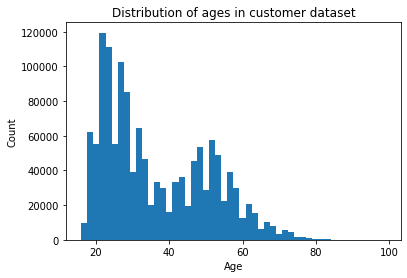

In [20]:
plt.hist(df['age'], bins=50)
plt.title('Distribution of ages in customer dataset')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Notice bimodal distribution of customer age data. Initial hypothesis is that teenagers/people in their early 20s are most popular buyers of h&m products, and then parents who have teens/children in their 20s (ages 40-60) are buying clothes for their children.

In [22]:
# top 20 ages for hm customers
df.age.value_counts().head(20)

21.0    67530
24.0    56124
20.0    55196
25.0    54989
23.0    54867
26.0    53658
22.0    51869
27.0    49134
28.0    44294
29.0    40697
30.0    39235
19.0    37707
31.0    36354
51.0    29720
50.0    28920
32.0    28354
52.0    27956
49.0    27895
48.0    25715
53.0    25191
Name: age, dtype: int64

In [24]:
# bottom 20 ages for hm customers
df.age.value_counts().tail(20).sort_values()

94.0      3
96.0      3
93.0      4
97.0      4
98.0      7
95.0     10
99.0     13
91.0     16
92.0     17
89.0     23
90.0     24
87.0     41
88.0     49
86.0     50
85.0     95
84.0    113
83.0    124
16.0    161
82.0    218
81.0    298
Name: age, dtype: int64

In the bottom 20, it's mostly people aged 80+ years old. One interesting inclusion is 16 year olds in the bottom 20 customers list.